## Try to plot out some images from the pre-Beamtime camera testing

This log is part of the practices for 1st POLARIS XFEL beamtime at Desy, FLASH (Oct.2018)

Peter has obtained some images before the real beamtime. 

As indicated by Peter, run 24809 file1&2 could contain some images. Therefore I just try to plot out some images from that file.

----------- 
 Created by  Hsin-Yi Wang (wang.hy@fysik.su.se), Date: 28-Sep-2018
- Note: This script shuld be operated under Python 3 environment 

### Import modules and useful function

In [12]:
import numpy as np
import random
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import h5py
import sys
from os import walk
from mpl_toolkits.axes_grid1 import make_axes_locatable

sys.path.insert(0, '../src/')
import fit_data_tools
from fit_data_tools import *

### Load data and plot out one random and one averaged image

['FLASH1_USER2_stream_2_run24809_file2_20180927T155318.1.h5'
 'FLASH1_USER2_stream_2_run24809_file1_20180927T154939.1.h5']


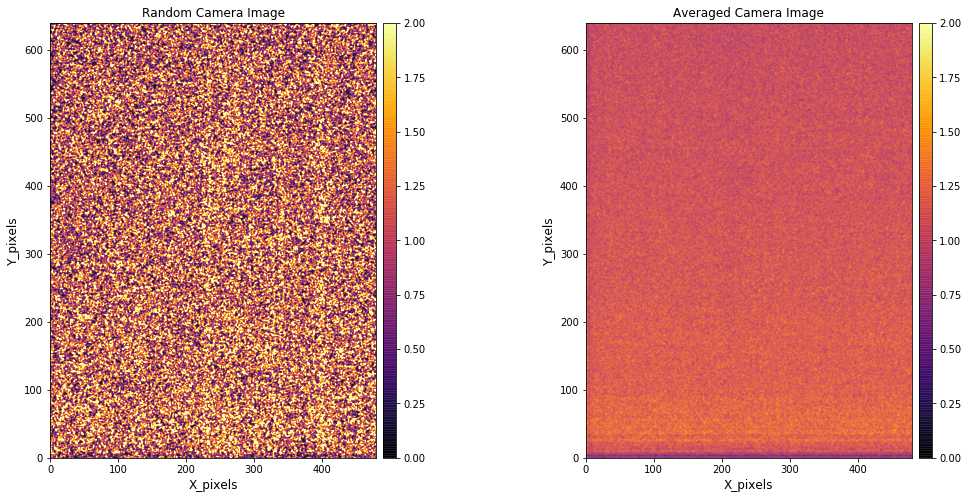

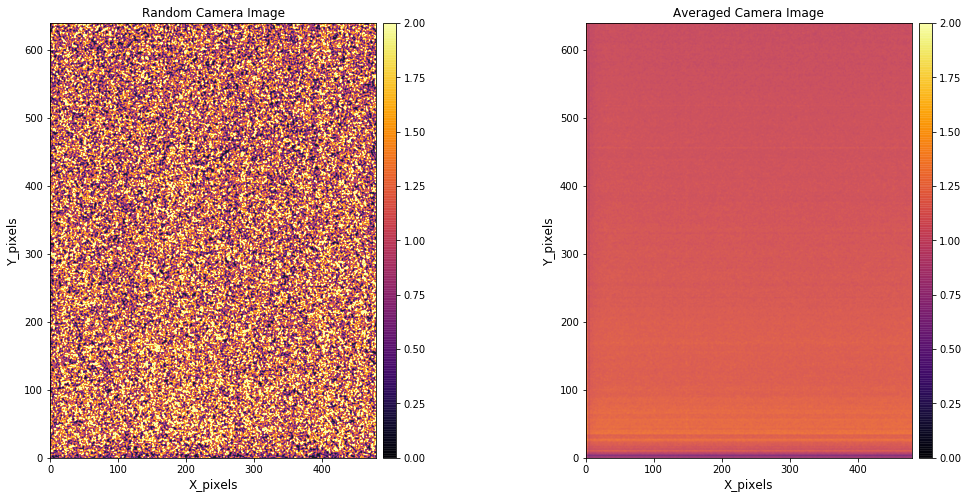

In [16]:
data_path = '/Users/hsin-yiwang/Desktop/Insitucell_for_XPS/FlashBeamtime/DATA/'
data_names = discover_datas(data_path)
print (data_names)

for i in range(len(data_names)):
    h5file = h5py.File(data_path+data_names[i], 'r')
    Image = h5file['/FL1/Experiment/Camera/PG/Basler FW 1/image/'].value
    thr = 3
    Image[Image<thr]=0
    N_shots = Image.shape[0]
    
    plt.figure(figsize=[16,8])
    
    ax = plt.subplot(1,2,1)
    i = random.randint(0,N_shots-1)
    Random_image = Image[i,:,:]
    plt.imshow(Random_image,vmin=0,vmax=2, origin='lower', interpolation='bicubic',cmap='inferno',alpha = 0.9)
    plt.title('Random Camera Image',size=12)
    plt.xlabel('X_pixels',size=12)
    plt.ylabel('Y_pixels',size=12)
    plt.xlim(0,480)
    plt.ylim(0,640)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="4%", pad=0.1)
    plt.colorbar(cax=cax)
    plt.subplots_adjust(wspace=0.5)
    
    ax = plt.subplot(1,2,2)
    Avg_image = np.sum(Image, axis = 0)/N_shots
    plt.imshow(Avg_image,vmin=0,vmax=2, origin='lower', interpolation='bicubic',cmap='inferno',alpha = 0.9)
    plt.title('Averaged Camera Image',size=12)
    plt.xlabel('X_pixels',size=12)
    plt.ylabel('Y_pixels',size=12)
    plt.xlim(0,480)
    plt.ylim(0,640)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="4%", pad=0.1)
    plt.colorbar(cax=cax)
    plt.subplots_adjust(wspace=0.5)
    
    #plt.tight_layout()
    #plt.savefig('/Users/Hsin-YiWang/Desktop/%s.png' %str(data_names[i][:-5]), dpi=300)
plt.show()